In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [ ]:
# Função do desafio 14
def objetive_function(args):
    f = 0
    tam,x, c = args
    for i in range(tam):
        f+=x[i]*(c[i]+np.log(x[i]/sum(x)))
    return f

In [ ]:
def function_constraints (args):
    x = args
    h = [None]*3
    h[0] = x[0]+2*x[1]+2*x[2]+x[5]+x[9]-2
    h[1] = x[3]+2*x[4]+x[5]+x[6]-1
    h[2] = x[2]+x[6]+x[7]+2*x[8]+x[9]-1
    return h

In [ ]:
#setando a função fitness
fitness_function = objetive_function

In [ ]:
#setando as restrições
constraint_func= function_constraints

In [ ]:
# Função para inicializar a população
def initialize_population(pop_size, num_variables, min_val, max_val):
    return np.random.uniform(min_val, max_val, (pop_size, num_variables))

In [ ]:
# Função de seleção de pais (Torneio)
def select_parents(population, fitness, tournament_size):
    selected_parents = []
    pop_size = population.shape[0]
    for _ in range(pop_size):
        tournament_indices = np.random.choice(range(pop_size), size=tournament_size, replace=False)
        tournament_fitness = fitness[tournament_indices]
        selected_parent_idx = tournament_indices[np.argmin(tournament_fitness)]
        selected_parents.append(population[selected_parent_idx])
    return np.array(selected_parents)

In [ ]:
# Função de crossover (Ponto Único)
def crossover(parents, crossover_rate):
    num_parents, num_variables = parents.shape
    children = np.empty((num_parents, num_variables))
    for i in range(0, num_parents, 2):
        if np.random.rand() < crossover_rate:
            crossover_point = np.random.randint(1, num_variables)
            children[i] = np.concatenate((parents[i][:crossover_point], parents[i+1][crossover_point:]))
            children[i+1] = np.concatenate((parents[i+1][:crossover_point], parents[i][crossover_point:]))
        else:
            children[i] = parents[i]
            children[i+1] = parents[i+1]
    return children

In [ ]:
# Função de mutação (Uniforme)
def mutate(children, mutation_rate, min_val, max_val):
    mutated_children = np.copy(children)
    for child in mutated_children:
        for i in range(len(child)):
            if np.random.rand() < mutation_rate:
                child[i] = np.random.uniform(min_val[i], max_val[i])
    return mutated_children

In [ ]:
# Função para avaliar o fitness de cada indivíduo na população
def evaluate_population(population):
    return np.apply_along_axis(fitness_function, 1, population)

In [ ]:
# Função para avaliar o fitness de cada indivíduo na população, com penalização para soluções inviáveis
def evaluate_population_with_constraints(population, constraint_func):
    fitness = np.apply_along_axis(fitness_function, 1, population)
    for i, sol in enumerate(population):
        if not all(c >= 0 for c in constraint_func(sol)):
            fitness[i] = np.inf  # Penalizar soluções inviáveis com um fitness infinito
    return fitness

In [ ]:
# Função para encontrar o melhor indivíduo na população
def find_best_individual(population, fitness):
    best_idx = np.argmin(fitness)
    return population[best_idx], fitness[best_idx]

In [ ]:
# Algoritmo Genético
def genetic_algorithm(num_generations, pop_size, num_variables, min_val, max_val, crossover_rate, mutation_rate, tournament_size):
    population = initialize_population(pop_size, num_variables, min_val, max_val)
    best_fitness = []
    best_solutions = []
    all_solutions=[]
    all_fitness=[]
    for _ in range(num_generations):
        fitness = evaluate_population(population)
        # fitness = evaluate_population_with_constraints(population,constraint_func)
        best_individual, best_fitness_value = find_best_individual(population, fitness)
        best_fitness.append(best_fitness_value)
        best_solutions.append(best_individual)
        for i in range(pop_size):
          all_solutions.append(population[i])
          all_fitness.append(fitness[i])
        parents = select_parents(population, fitness, tournament_size)
        children = crossover(parents, crossover_rate)
        mutated_children = mutate(children, mutation_rate, min_val, max_val)
        population = mutated_children
    return best_fitness, best_solutions, all_fitness, all_solutions

In [ ]:
# Parâmetros do algoritmo genético
num_generations = [100,1000,10000]
pop_size = 80
num_variables = 2
# min_val = [0.00625,0.00625,10,10]
# max_val = [5,5,200,200]
min_val = [-32.768,-32.768]
max_val = [32.768,32.768]
crossover_rate = 0.8
mutation_rate = 0.1
tournament_size = 3

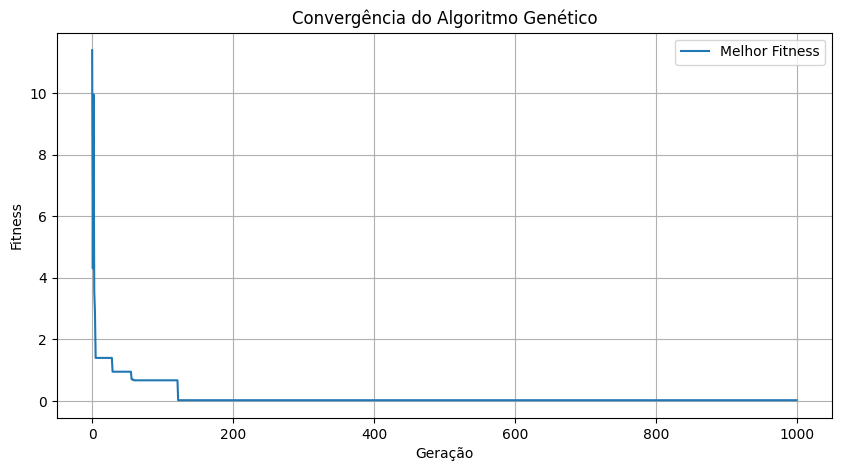

In [1]:
# Execução do algoritmo genético
best_fitness, best_solutions, all_fitness, all_solutions = genetic_algorithm(num_generations, pop_size, num_variables, min_val, max_val, crossover_rate, mutation_rate, tournament_size)


# Plotando o gráfico da convergência do algoritmo
plt.figure(figsize=(10, 5))
plt.plot(best_fitness, label='Melhor Fitness')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.title('Convergência do Algoritmo Genético')
plt.legend()
plt.grid(True)
plt.show()

#Dados para plot do gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1_v = np.array(all_solutions)[:,0]
x2_v = np.array(all_solutions)[:,1]

surf =ax.scatter(x1_v,x2_v,all_fitness,s=1, color='r')


